# Pràctica 5: Arbres de Decisió


> # Miquel Monge Dalmau

## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent **dijous abans de les 23:59**. Es pujará un .ipynb ja executat, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta pràctica tractará els següents temes:

* A. Estructura dels Arbres de Decisió i codificació d'atributs (30%)
* B. Selecció de mesures d'atributs (20%)
* C. Pruning (20%)
* D. Ensembles (30%)

Per descomptat, tots els experiments seguiran aplicant els coneixements apresos a les pràctiques anteriors, és a dir, aplicant una metodologia correcta de crosvalidació per tal de poder extreure conclusions vàlides.


### Datasets

Es faràn servir dues bases de dades:

* **car_evaluation.csv** (target: 'class') 

* **income_evaluation.csv** (target: 'income')

Inicialment, es farán les proves amb el car_evaluation. Al apartat D s'utilitzaràn els dos. De tota forma, si ho preferiu, també podeu anar fer proves amb income_evaluation ens els altres apartats.


### Introducció

Els arbres de decisió són un dels algorismes d’aprenentatge automàtic més populars. Utilitzen una estructura semblant a la dels arbres (o també en possibles combinacions seves). Pertany a la classe d’algoritmes d’aprenentatge supervisat on es pot utilitzar tant amb finalitats de classificació com de regressió.


Un arbre de decisió és una estructura que inclou un node arrel, branques i nodes de fulles. Cada node intern indica una prova d'un atribut, cada branca indica el resultat d'una prova i cada node fulla té una etiqueta de classe. El node més superior de l'arbre és el node arrel.

La terminologia implicada en l'algorisme de l'arbre de decisions són els següents:

* **Node arrel**: Representa tota la població o la mostra. A més, es divideix en dos o més conjunts homogenis.
* **Divisió**: És el procés de dividir un node en dos o més subnodes.
* **Node de decisió**: Quan un node es divideix en altres subnodes, es diu node de decisió.
* **Fulla / node terminal**: Els nodes que no es divideixen s’anomenen nodes Fulla o Terminals.
* **Poda**: Quan eliminem els subnodes d’un node de decisió, aquest procés s’anomena poda. És el procés contrari de la divisió.
* **Branca / subarbre**: Una subsecció d'un arbre sencer s'anomena branca o subarbre.
* **Node pare i fill**: Un node, que es divideix en subnodes, s’anomena node pare de subnodes on els subnodes són fills d’un node pare.

![Decision-Tree terminology](https://gdcoder.com/content/images/2019/05/Screen-Shot-2019-05-18-at-03.40.41.png)

Com s'ha explicat a teoria, els arbres de decisió originals treballaven sobre atributs categorics sense problema. Ara bé, la implementació de sklearn i la majoria de les actuals, necesita dades númeriques, aixi que haurem de transformar les nostres bases de dades a aquesta tipologia.

Explicació del la tipologia de arbres de Decisió: ID3, C4.5, C5.0 i CART. Sabeu quin està implementat a sklearn i per què les dades d'entrada han de ser numèriques i no categòriques? **[Pista](https://scikit-learn.org/stable/modules/tree.html)**


In [19]:
# Importar llibreries i obrir el dataset

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
# sns.set_theme()

# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple

dataset_path = 'income_evaluation.csv'
target_name = 'income'

dataset_path = 'car_evaluation.csv'
target_name = 'class'

dataset = load_dataset(dataset_path)
y = dataset[target_name]
X = dataset.drop(target_name, axis="columns")

print("Dimensionalitat de la BBDD:", dataset.shape)


Dimensionalitat de la BBDD: (1728, 7)


In [20]:
display(dataset)

display(y)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1382, 6), (346, 6))

## A. Estructura dels Arbres de Decisió i codificació d'atributs (30%)

Com transformar dades Categoriques en numèriques:

**[module-sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)**

o bé, 

**[Category Encoders](https://contrib.scikit-learn.org/category_encoders/)**

Aquesta llibreria us permetrar provar codificacions ben diferents..:
* BackwardDifferenceEncoder
* BaseNEncoder
* BinaryEncoder
* CatBoostEncoder
* CountEncoder
* GLMMEncoder
* HashingEncoder
* HelmertEncoder
* JamesSteinEncoder
* LeaveOneOutEncoder
* MEstimateEncoder
* OneHotEncoder
* OrdinalEncoder
* SumEncoder
* PolynomialEncoder
* TargetEncoder
* WOEEncoder

En aquest enllaç hi podreu trobar alguns **[exemples](https://www.kaggle.com/discdiver/category-encoders-examples)**.

**[Com aplicar-ho a pandas?](https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn)**


In [22]:
# Una manenra d'aplicar-ho a columnes en concret
import category_encoders as ce

# encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
encoder = ce.OrdinalEncoder(cols='buying') # totes columnes
print(X['buying'].unique())

ecnoder_X_train_1 = encoder.fit_transform(X_train) # equivalent a les dos linees d'abaix
#encoder.fit(X_train)
#encoded_X_test_1 = encoder.transform(X_test)

encoder_X_test_1 = encoder.transform(X_test)
encoder.category_mapping

['vhigh' 'high' 'med' 'low']


[{'col': 'buying',
  'mapping': vhigh    1
  med      2
  low      3
  high     4
  NaN     -2
  dtype: int64,
  'data_type': dtype('O')}]

In [23]:
# Una altra manera per fer-ho a totes les columnes no númeriques..

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

encoders = defaultdict(LabelEncoder) # dicionari amb totes les codificacions

# Encoding the variable
encoded_X_train_2 = X_train.apply(lambda x: encoders[x.name].fit_transform(x)) 
encoded_X_test_2 = X_test.apply(lambda x: encoders[x.name].transform(x))

# Inverse the encoded
# igual al X_train
inversed_X_train = encoded_X_train_2.apply(lambda x: encoders[x.name].inverse_transform(x))

# Using the dictionary to label future data
# X_train.apply(lambda x: encoders[x.name].transform(x))

print("\n The result of transforming X with LabelEncoder:")
print(encoded_X_train_2)



 The result of transforming X with LabelEncoder:
      buying  maint  doors  persons  lug_boot  safety
107        3      3      3        2         0       0
901        2      3      1        1         2       2
1709       1      1      3        0         0       0
706        0      2      2        0         1       2
678        0      2      1        0         1       1
...      ...    ...    ...      ...       ...     ...
1130       2      2      1        2         1       0
1294       2      1      3        2         0       2
860        0      1      3        2         1       0
1459       1      0      2        0         2       2
1126       2      2      1        2         2       2

[1382 rows x 6 columns]


## Creació i visualització d'arbres de decisió

Sklearn ens dona una versió bàsica dels algorismes de generació d'arbres de decisió [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Caldrà treballar sobre els diferents paràmetres per a obtenir la millor solució per, almenys, un dels problemes plantejats.

Per visualitzar els arbres hi ha diferents possibilitats que podeu usar [exemples](https://mljar.com/blog/visualize-decision-tree/)

|--- feature_3 <= 0.50
|   |--- class: unacc
|--- feature_3 >  0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |   |   |--- class: unacc
|   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |--- class: acc
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- class: unacc
|   |   |   |--- feature_0 >  0.50
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |   |   |--- feature

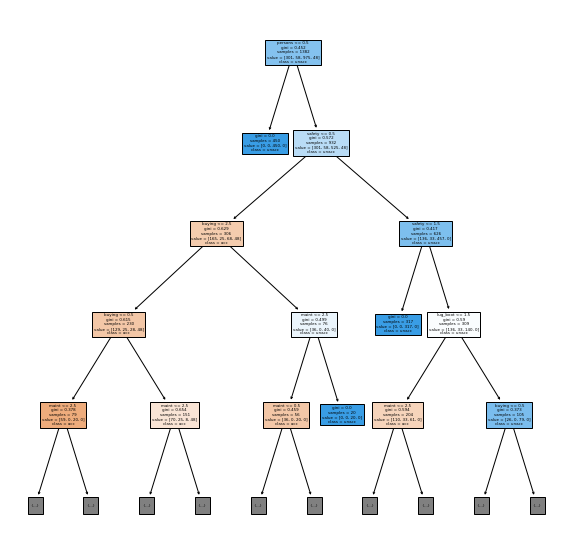

In [24]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

clf = DecisionTreeClassifier(random_state=1234)
clf.fit(encoded_X_train_2, y_train) # ajustes utilitzant les dades codificades
text_representation = tree.export_text(clf)
print(text_representation)


fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, max_depth=4,
                   feature_names=X.columns,
                   class_names=clf.classes_,
                   filled=True)
plt.show()

Un cross validation NO és un random forest !!

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0, max_depth=3)
iris = load_iris()
cross_val_score(clf, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 1.        , 1.        ])

### Preguntes
1. Proveu diferents codificacions per transformar els vostres atributs categorics en númerics. Expliqueu els beneficis o inconvenients de les codificacions provades.  

En total provaré quatre tipus de codificacions: one hot encoder, ordinal encoder, label encoder i binary encoder.

In [26]:
# BBDD i target
dataset_path = 'car_evaluation.csv'
target_name = 'class'

# LLegim BBDD
dataset = load_dataset(dataset_path)
y = dataset[target_name]
X = dataset.drop(target_name, axis="columns")

# Separem conjunts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
cols_to_encode = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

# OneHotEncoder
ce_one_hot = ce.OneHotEncoder(cols = cols_to_encode)
X_train_one_hot = ce_one_hot.fit_transform(X_train)
X_test_one_hot = ce_one_hot.fit_transform(X_test)

# OrdinalEncoder
ce_ordinal_encoder = ce.OrdinalEncoder(cols = cols_to_encode) 
X_train_ordinal_encoder = ce_ordinal_encoder.fit_transform(X_train) 
X_test_ordinal_encoder = ce_ordinal_encoder.fit_transform(X_test)

# LabelEncoder
ce_label_encoders = defaultdict(LabelEncoder)
X_train_label_encoder = X_train.apply(lambda x: ce_label_encoders[x.name].fit_transform(x))
X_test_label_encoder = X_test.apply(lambda x: ce_label_encoders[x.name].transform(x))

# Binary Encoder
ce_binary_encoder = ce.BinaryEncoder(cols = cols_to_encode)
X_train_binary_ecnoder = ce_binary_encoder.fit_transform(X_train)
X_test_binary_ecncoder = ce_binary_encoder.fit_transform(X_test)

C:\Users\mdalm\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [28]:
# OneHotEncoder
print("OneHotEncoder: ")
display(X_train_one_hot)

# OrdinalEncoder
print("\nOrdinalEncoder: ")
display(X_train_ordinal_encoder)

# LabelEncoder
print("\nLabelEncoder: ")
display(X_train_label_encoder)

# Binary Encoder
print("\nBinary Encoder: ")
display(X_train_binary_ecnoder)

OneHotEncoder: 


,buying_1,buying_2,buying_3,buying_4,maint_1,maint_2,maint_3,maint_4,doors_1,doors_2,doors_3,doors_4,persons_1,persons_2,persons_3,lug_boot_1,lug_boot_2,lug_boot_3,safety_1,safety_2,safety_3
107,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
901,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
1709,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0
706,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0
678,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0
1294,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
860,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
1459,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0



OrdinalEncoder: 


,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3
...,...,...,...,...,...,...
1130,2,3,2,1,3,1
1294,2,2,1,1,1,2
860,4,2,1,1,3,1
1459,3,4,3,3,2,2



LabelEncoder: 


,buying,maint,doors,persons,lug_boot,safety
107,3,3,3,2,0,0
901,2,3,1,1,2,2
1709,1,1,3,0,0,0
706,0,2,2,0,1,2
678,0,2,1,0,1,1
...,...,...,...,...,...,...
1130,2,2,1,2,1,0
1294,2,1,3,2,0,2
860,0,1,3,2,1,0
1459,1,0,2,0,2,2



Binary Encoder: 


,buying_0,buying_1,buying_2,maint_0,maint_1,maint_2,doors_0,doors_1,doors_2,persons_0,persons_1,persons_2,lug_boot_0,lug_boot_1,lug_boot_2,safety_0,safety_1,safety_2
107,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
901,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0
1709,0,1,1,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1
706,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0
678,1,0,0,0,1,1,0,1,0,0,1,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,0,1
1294,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
860,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1
1459,0,1,1,1,0,0,0,1,1,0,1,1,0,1,0,0,1,0


**OneHotEncoder**:
- One-Hot-Encoding té l'avantatge que el resultat és binari i que tot es troba en un espai vectorial ortogonal. El desavantatge és que per a una cardinalitat alta, l'espai de funcions realment pot créixer ràpidament. Es diferencien els N registres amb l'objectiu de codificar N estats i a cada registre se li associa un valor binari.

- Tot i que la codificació LabelEncoder és directe té l'inconvenient que els valors numèrics poden ser malinterpretats pels algorismes com que tenen algun tipus de jerarquia/ordre. Aquest problema d'ordenació s'aborda en un altre enfocament alternatiu comú anomenat "Codificació One-Hot". En aquesta estratègia, cada valor de categoria es converteix en una nova columna i s'assigna un valor 1 o 0 (notació per a cert/fals) a la columna.

**LabelEncoder**:
- Aquest mètode és molt simple, consisteix a convertir cada valor de les columnes en un nombre. Que utilitzi una seqüència numèrica per la codificació pot induir un nou problema depenent de la BBDD. El problema amb la seqüència numèrica és que introdueixen relació/comparació entre les columnes.

- LabelEncoder només pot processar una llista o una instància similar a una matriu alhora, ja que va ser dissenyada per a la variable objectiva. Quan tenim una BBDD amb moltes característiques, és molt millor fer servir un codificador que sigui capaç de gestionar múltiples funcions categòriques alhora.

**BinaryEncoder**:
- És un codificador molt similar a OneHotEncoder, però en aquest cas redueix el nombre de columnes de sortida al log2 de la longitud dels diferents valors.

2. Crea un arbre arbre de decisió amb les dades transformades.

In [29]:
clf = tree.DecisionTreeClassifier()
arbre = clf.fit(X_train_label_encoder, y_train)

3. Mostra el arbre de diferents formes

In [30]:
# Print Text Representation
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- class: unacc
|--- feature_3 >  0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |   |   |--- class: unacc
|   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |--- class: acc
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- class: unacc
|   |   |   |--- feature_0 >  0.50
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |   |   |--- feature

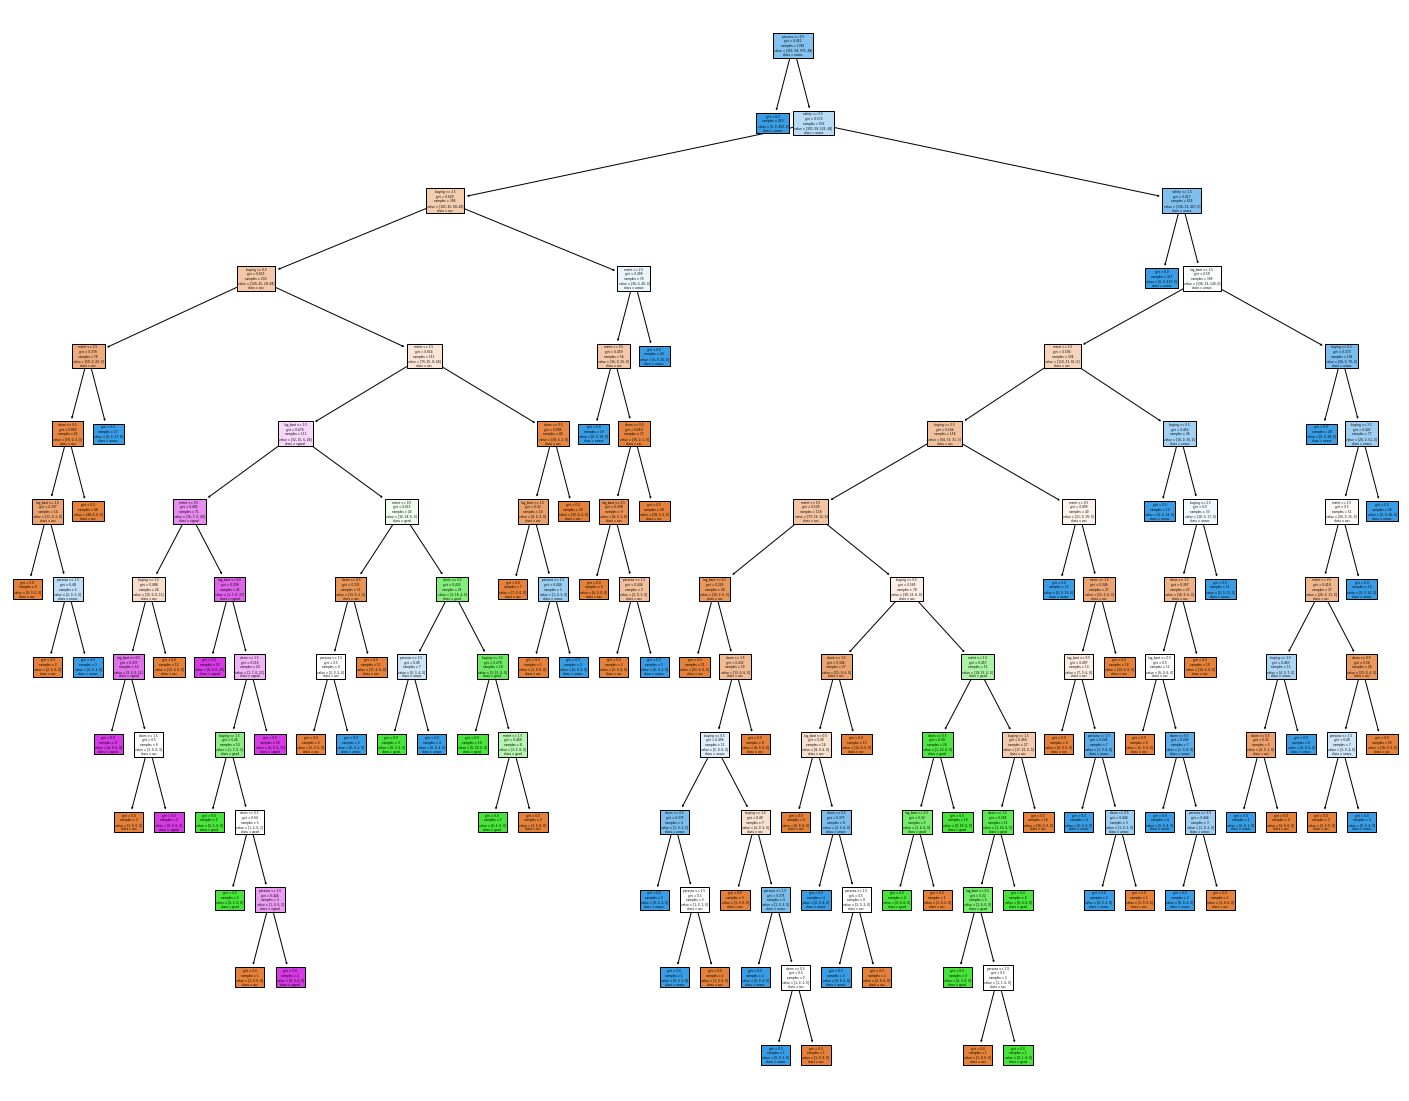

In [31]:
# Plot Tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names = X_train_label_encoder.columns,  
                   class_names = clf.classes_,
                   filled=True)


In [34]:
# Plot with graphviz
import graphviz
dot_data = tree.export_graphviz(clf, 
                                feature_names=X_train_label_encoder.columns,  
                                class_names=clf.classes_,
                                filled=True,
                                proportion=True)

# Draw graph
#display(graphviz.Source(dot_data, format="svg")) # Display molt gran


ModuleNotFoundError: No module named 'graphviz'

4. Extreu caracteristiques que quantifiquin com és l'arbre. Més endavant també en farem ús per comparar diferents arbres. A continuació et mostro algunes possibles característiques. Penseu en generar-ne alguna més que cregueu útil:
 * número de nodes total,
 * número de nodes fulla,
 * ratio de nodes fulla respecte el total,
 * profunditat mitjana de les fulles,
 * atributs més utilitzats,
 * entropia o impuresa dels nodes fulla
 * ... 

In [35]:
def print_tree_info(model):
    # Recuperem informació
    nodes = model.tree_.node_count
    fulles = model.get_n_leaves()
    prof_mitjana = model.get_depth()
    feature = model.feature_importances_
    total_classes = model.n_classes_
    classes = model.classes_
    max_features = model.max_features_
    n_features_in = model.n_features_in_
    n_outputs = model.n_outputs_

    # Visualitzem la informació
    print("Nodes =", nodes)
    print("Fulles =", fulles)
    print("Ratio de nodes fulla respecte el total =", fulles/nodes)
    print("Profunditat mitjana de les fulles =", prof_mitjana)
    print("Característiques més importants =", feature)
    print("Total de classes =", total_classes)
    print("Classes =", classes)
    print("El valor inferit de max_features: ", max_features)
    print("Nombre de característiques vistes durant l'ajust (fit): ", n_features_in)
    print("Nombre de sortides quan després de l'ajust (fit): ", n_outputs)

print_tree_info(clf)

Nodes = 157
Fulles = 79
Ratio de nodes fulla respecte el total = 0.5031847133757962
Profunditat mitjana de les fulles = 13
Característiques més importants = [0.15562488 0.24692155 0.05913626 0.18091615 0.10368887 0.25371228]
Total de classes = 4
Classes = ['acc' 'good' 'unacc' 'vgood']
El valor inferit de max_features:  6
Nombre de característiques vistes durant l'ajust (fit):  6
Nombre de sortides quan després de l'ajust (fit):  1


5. Com afecta la codificació utilitzada a la interpretabilitat del model, veus alguna relació amb les característiques del arbre?

El mètode de codificació que s'utilitzi afectarà com l'algoritme aprengui i interpreti les dades. No hi ha codificadors millor que altres, tot depèn de les nostres dades i característiques. EL principal problema és que hi haurà codificacions que facin que el model interpreti de forma errònia les dades donant més pes o prioritat a una característica respecte a les altres.

## B. Selecció de mesures d'atributs (20%)
El principal repte en la implementació de l'arbre de decisions és identificar els atributs que considerem com a node arrel i cada nivell. Aquest procés es coneix com a **selecció d’atributs**. Hi ha diferents mesures de selecció d’atributs per identificar l’atribut que es pot considerar com el node arrel de cada nivell. Les 2 mesures més populars:

### Guany d'informació (entropy)

En utilitzar el guany d’informació com a criteri, intentem estimar la informació que conté cada atribut. Per entendre aquest concepte, hem de conèixer el que significa l'**Entropia**.

L’entropia mesura la impuresa del conjunt de dades donat. A Física i Matemàtiques, l’entropia es coneix com l’atzar o incertesa d’una variable aleatòria $X$. En teoria de la informació, es refereix a la impuresa d’un grup d’exemples. **El guany d'informació** és la disminució de l'entropia. El guany d'informació calcula la diferència entre l'entropia abans de la divisió i l'entropia mitjana després de la divisió del conjunt de dades en funció dels valors d'atribut donats.

L’entropia es representa amb la següent fórmula:

$$ Entropy = \sum_{i=1}^{C} -p_i * log_2(p_i) $$

Aquí, $c$ és el nombre de classes i $p_i$ és la probabilitat associada a la classe $i$.

L'algorisme de l'arbre de decisions ID3 (dicotomitzador iteratiu) utilitza l'entropia per calcular el guany d'informació. Per tant, calculant la disminució de la **mesura d’entropia** de cada atribut podem calcular el seu guany d’informació. L'atribut amb el guany d'informació més alt es tria com a atribut de divisió al node.


### Índex Gini

Una altra mesura de selecció d’atributs que utilitza **CART (arbres categòrics i de regressió)** és el **índex Gini**. 

L'índex de Gini es representa així:

$$ Gini = 1 - \sum_{i=1}^{C} (p_i)^2 $$

Aquí, de nou $c$ és el nombre de classes i $p_i$ és la probabilitat associada a la classe $i$.

L'índex de Gini diu que, si seleccionem a l'atzar dos ítems d'una població, han de ser de la mateixa classe i la probabilitat d'això és d'1 si la població és pura.

En cas d’un atribut de valor discret, el subconjunt que dóna l’índex de gini mínim per a l’escollit es selecciona com a atribut de divisió. En el cas d’atributs de valor continu, l’estratègia consisteix a seleccionar cada parell de valors adjacents com a possible punt de divisió i punt amb un índex de gini més petit triat com a punt de divisió. L’atribut amb índex Gini mínim s’escull com a atribut de divisió.

Com a norma general, s’utilitza el **guany d’informació** com a criteri quan els atributs són categòrics i que el **índex Gini** quan s’assumeixen que els atributs són continus, però ambdós es fan servir a sklearn indistintament.

### Preguntes

1. Busca els millors hiperparametres per crear un arbre de decisió utilitzant com a criteri el guany d'entropia.

In [36]:
from sklearn.model_selection import GridSearchCV

parametres = {
    'criterion': ['entropy'],
    'max_depth': np.arange(3, 15),
    'min_samples_split': np.arange(3, 6),
    'min_samples_leaf': np.arange(3, 10),
    'min_impurity_decrease': [0.0,0.1,0.2,0.5],
    }

search_grid = GridSearchCV(DecisionTreeClassifier(), parametres, cv = 10, verbose=True)
search_grid.fit(X_train_label_encoder, y_train)

# Resultats Grid
print('Best score:', search_grid.best_score_)

resultats_grid = pd.DataFrame(search_grid.cv_results_)
resultats_grid.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

Fitting 10 folds for each of 1008 candidates, totalling 10080 fits
Best score: 0.9573297883432383


,param_criterion,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_min_samples_split,mean_test_score,std_test_score
758,entropy,12,0.000,3,5,0.957,0.015


2. Busca els millors hiperparametres per crear un arbre de decisió utilitzant com a criteri la impuritat de Gini.

In [ ]:
parametres = {
    'criterion': ['gini'],
    'max_depth': np.arange(3, 15),
    'min_samples_split': np.arange(3, 6),
    'min_samples_leaf': np.arange(3, 10),
    'min_impurity_decrease': [0.0,0.1,0.2,0.5],
    }

search_grid = GridSearchCV(DecisionTreeClassifier(), parametres, cv = 10, verbose=True)
search_grid.fit(X_train_label_encoder, y_train)

# Resultats Grid
print('Best score:', search_grid.best_score_)

resultats_grid = pd.DataFrame(search_grid.cv_results_)
resultats_grid.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

Fitting 10 folds for each of 1008 candidates, totalling 10080 fits
Best score: 0.9529715358148264


,param_criterion,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_min_samples_split,mean_test_score,std_test_score
672,gini,11,0.000,3,3,0.953,0.018


3. S'assemblen els arbres resultants (visualment i en termes quantificables)? I la seva precisió en el conjunt de test, és similar?

Text(0.5, 1.0, 'Gini')

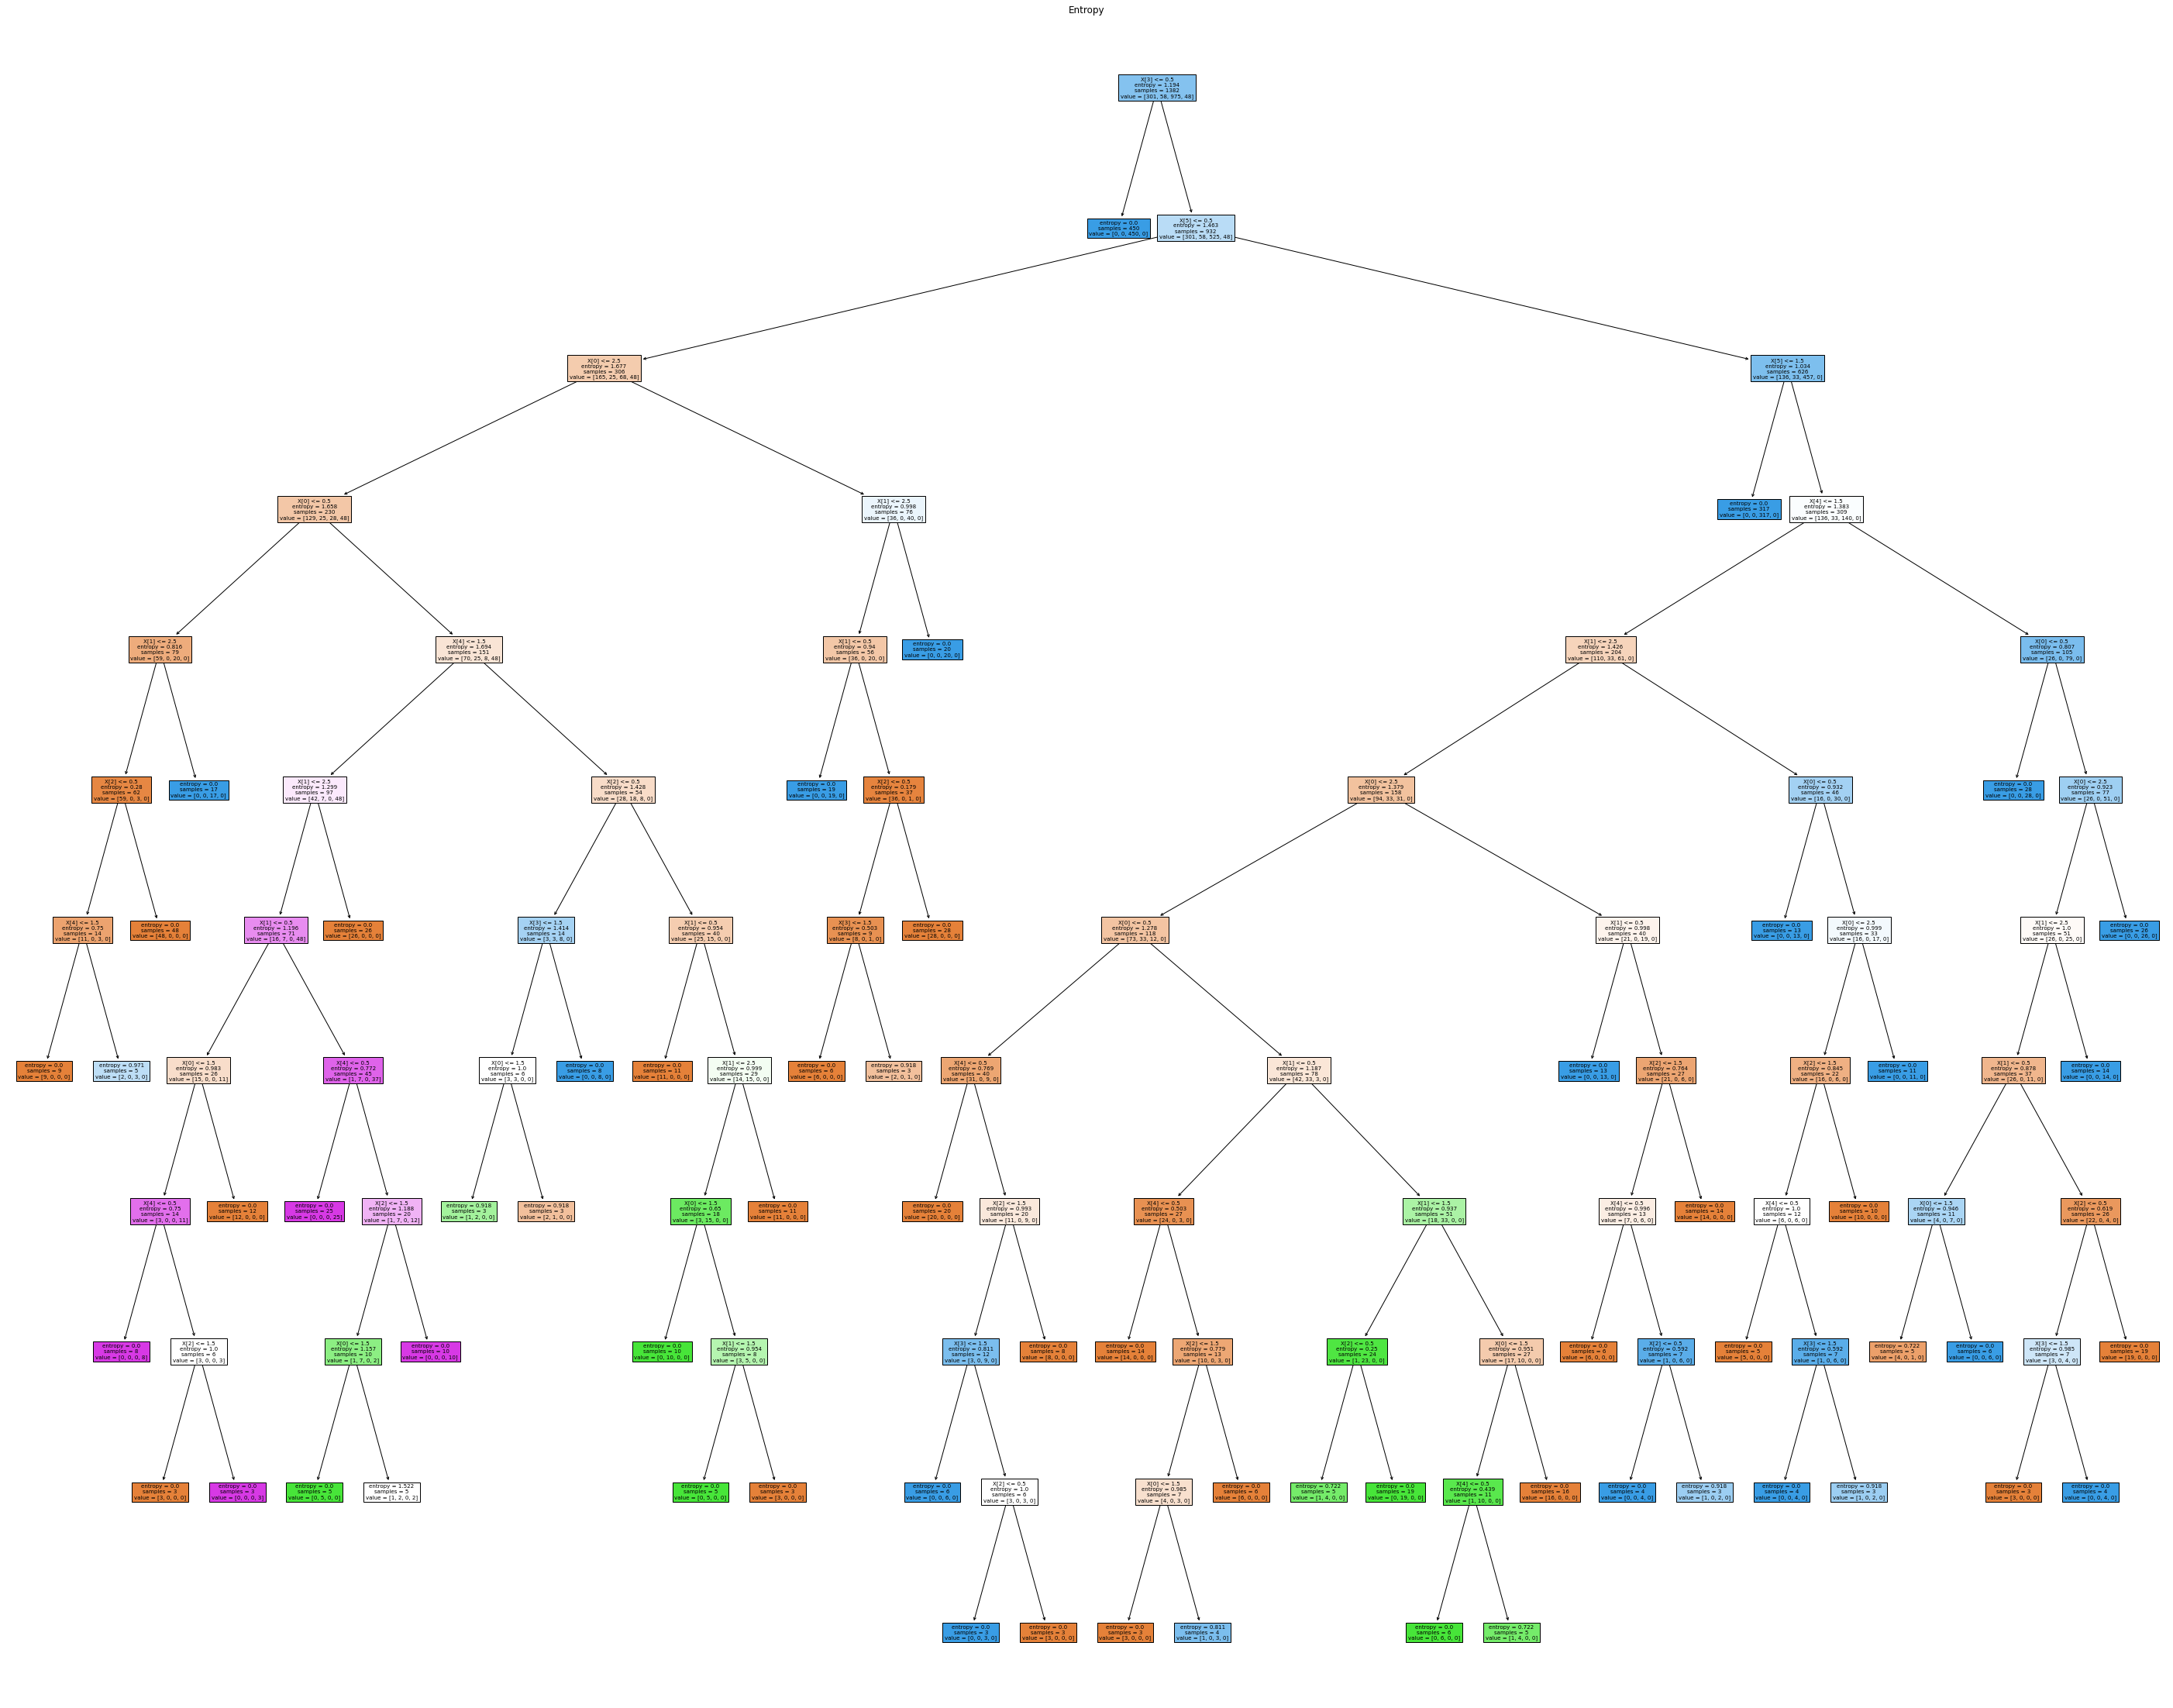

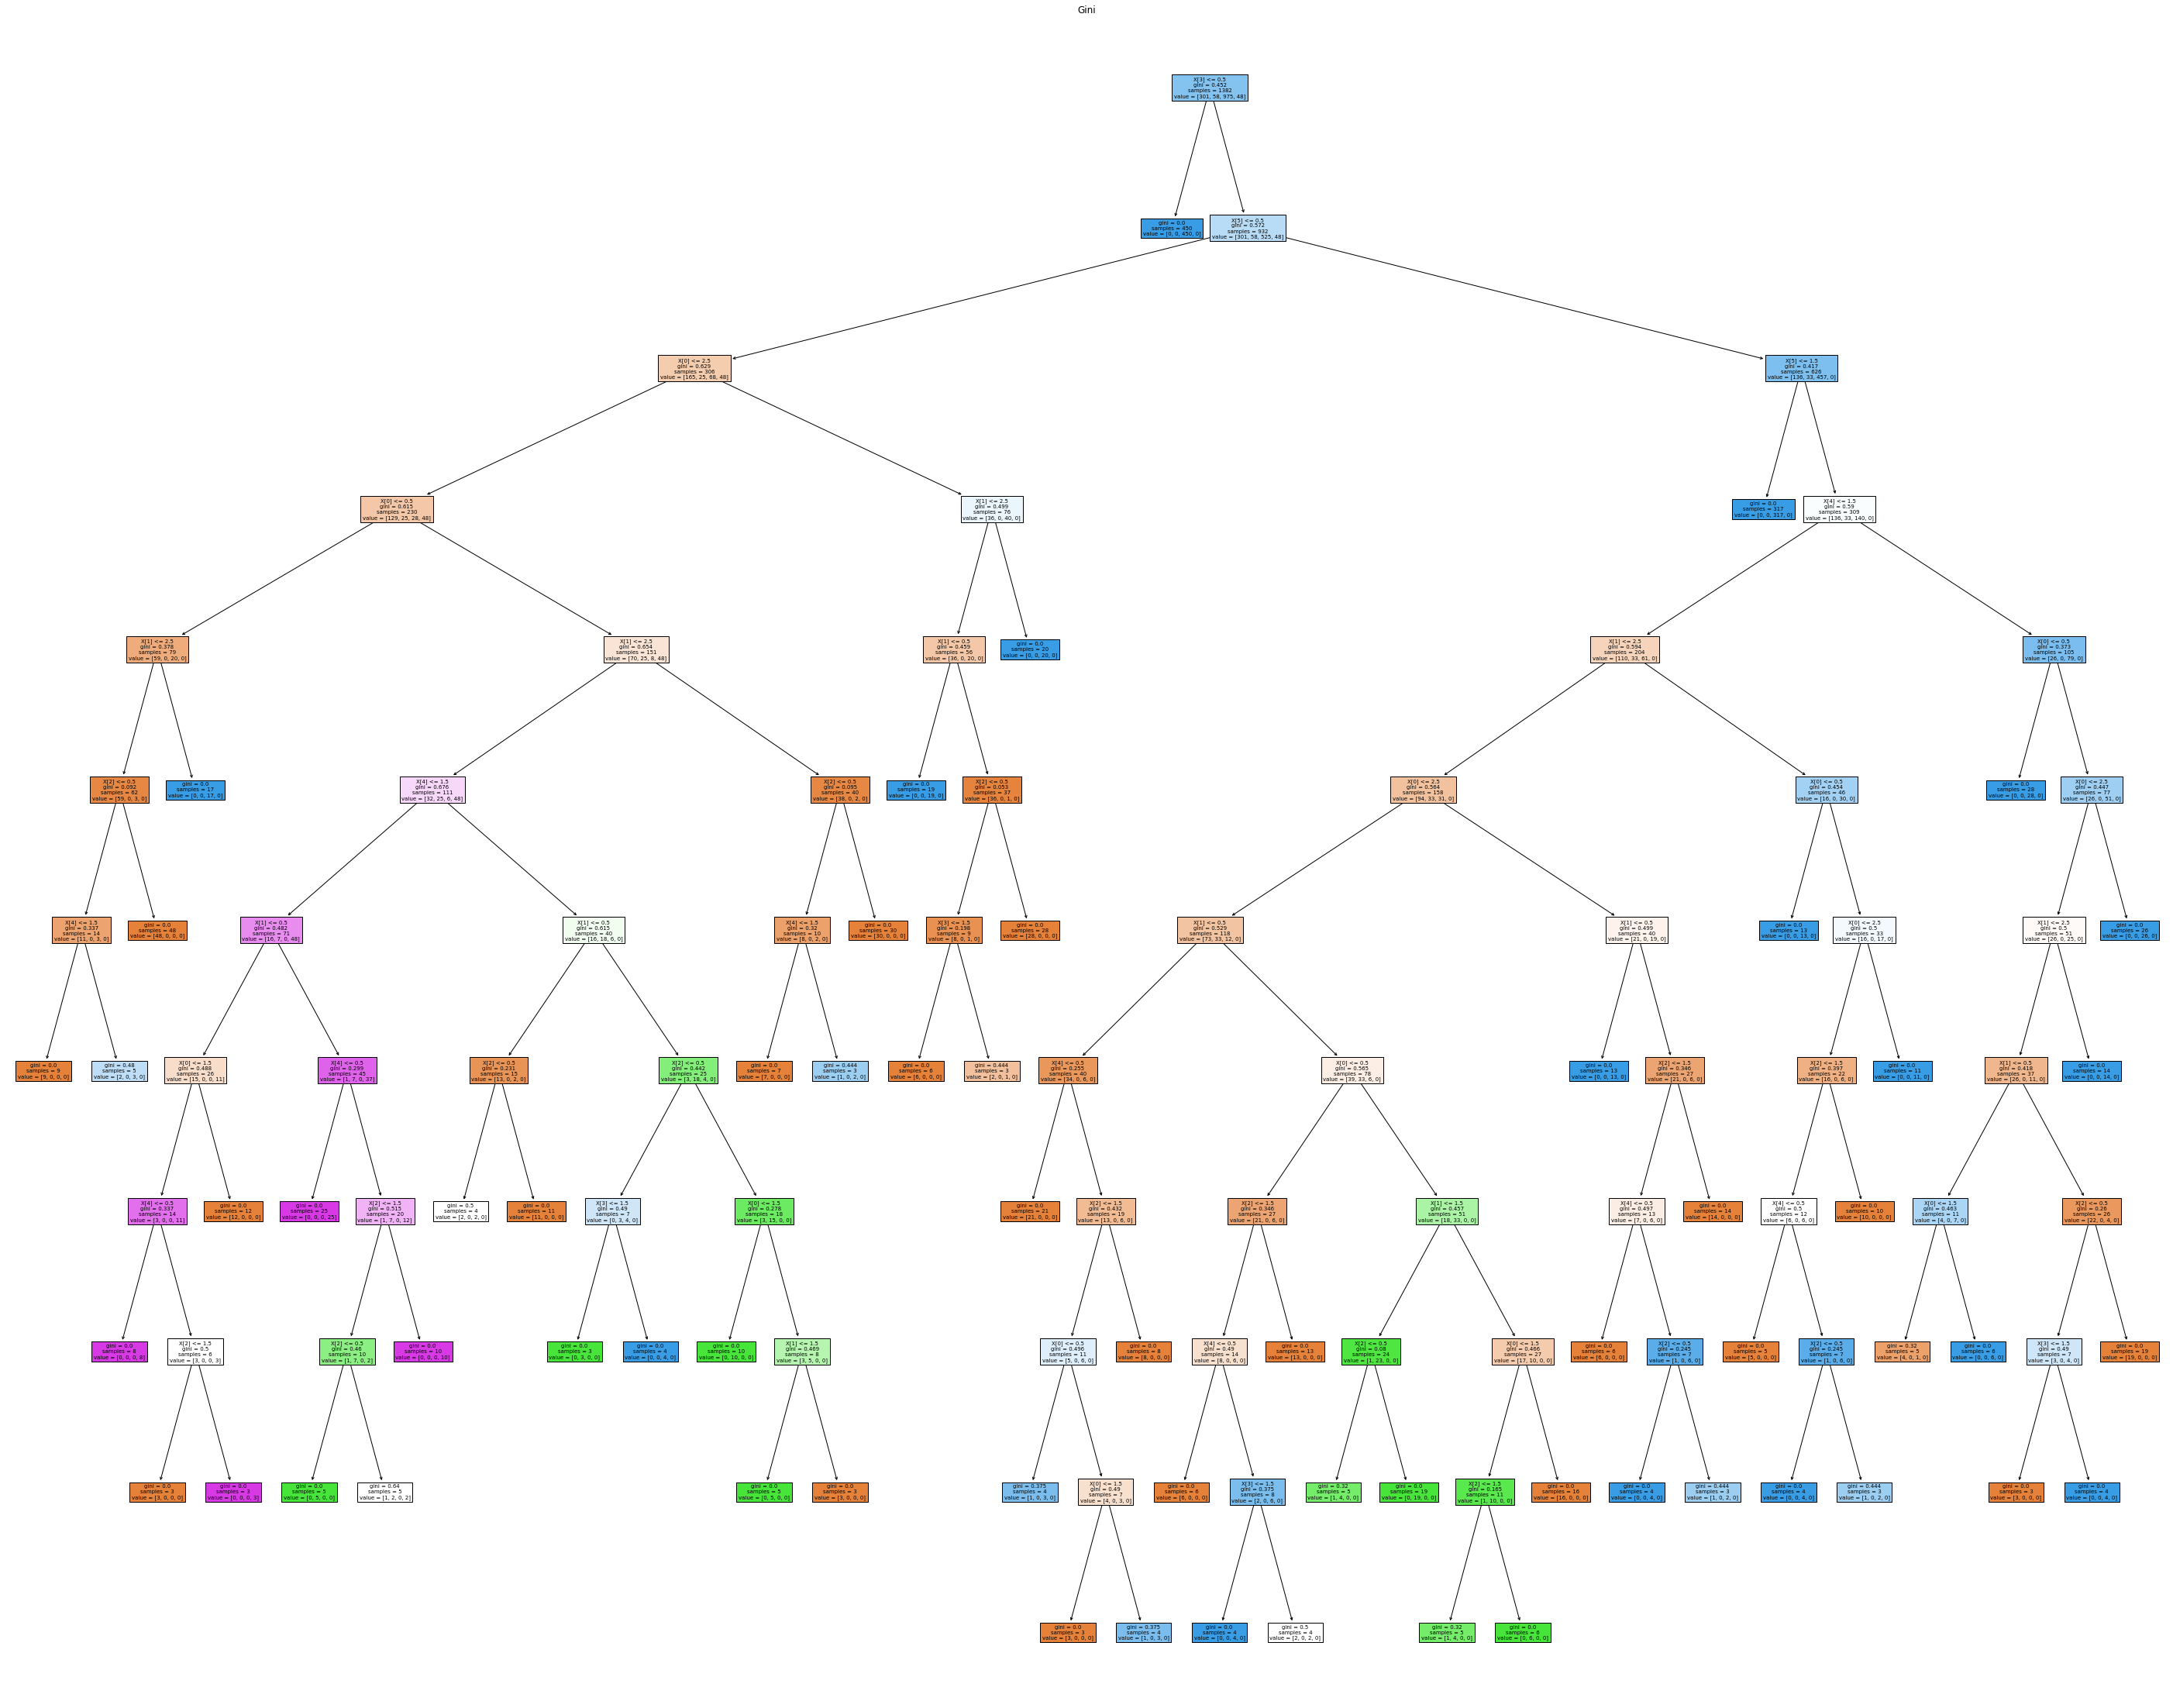

In [ ]:
# Entropia
clf_entropy = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 13, min_impurity_decrease = 0.000, min_samples_leaf = 3, min_samples_split = 4)
clf_entropy.fit(X_train_label_encoder, y_train)

fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(clf_entropy, filled=True)
plt.title('Entropy')

# Gini
clf_gini = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 11, min_impurity_decrease = 0.000, min_samples_leaf = 3, min_samples_split = 3)
clf_gini.fit(X_train_label_encoder, y_train)

fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(clf_gini, filled=True)
plt.title('Gini')

In [ ]:
# Resultats quantificables
print("Entropy info: ")
print_tree_info(clf_entropy)

Entropy info: 
Nodes = 121
Fulles = 61
Ratio de nodes fulla respecte el total = 0.5041322314049587
Profunditat mitjana de les fulles = 11
Característiques més importants = [0.17673263 0.20961996 0.05768605 0.19555821 0.09793093 0.26247221]
Total de classes = 4
Classes = ['acc' 'good' 'unacc' 'vgood']
El valor inferit de max_features:  6
Nombre de característiques vistes durant l'ajust (fit):  6
Nombre de sortides quan després de l'ajust (fit):  1


In [ ]:
print("Gini info: ")
print_tree_info(clf_gini)

Gini info: 
Nodes = 123
Fulles = 62
Ratio de nodes fulla respecte el total = 0.5040650406504065
Profunditat mitjana de les fulles = 11
Característiques més importants = [0.15917767 0.25624999 0.05219864 0.16586492 0.10321151 0.26329727]
Total de classes = 4
Classes = ['acc' 'good' 'unacc' 'vgood']
El valor inferit de max_features:  6
Nombre de característiques vistes durant l'ajust (fit):  6
Nombre de sortides quan després de l'ajust (fit):  1


## C. Pruning (20%)

L'overfitting és un problema comú quan es construeixen models d’arbres de decisions. El problema apareix quan l'algoritme continua aprofundint cada vegada més per reduir l'error del conjunt d'entrenament, però per contra, resulta que va augmentant l'error en el conjunt de test. Per tant, la precisió final del model será menor. Generalment passa quan es creen moltes branques a causa de valors atípics i irregularitats en les dades (o mal codificades) [Exemple del resultat de tenir Atributs mal codificats en un arbre de decisió](https://stackoverflow.com/questions/61217713/labelencoder-for-categorical-features/61217936).

Dos enfocaments que es poden utilitzar per evitar l'overfitting:

* **Poda prèvia**: aturem la construcció dels arbres abans d'arribar a la fulla final. Preferim no dividir un node si la seva mesura de bondat està per sota d’un valor llindar. Però és difícil triar un punt d’aturada adequat.

* **Post poda**: aprofundim cada vegada més en l’arbre per construir un arbre complet. Si l’arbre mostra problemes d'overfitting, la poda es fa com un pas posterior al aprenentatge. Mitjançant dades de validació creuada, comprovem si ampliar un node comportarà una millora o no. Si mostra una millora, podem continuar ampliant aquest node. Però si mostra una reducció de la precisió, no s’hauria d’ampliar. Per tant, el node s’hauria de convertir en un node fulla.

### Preguntes

1. Amb els parametres del millor arbre de l'apartat anterior, realitza una poda prèvia. Com pots validar si ho estàs fent bé?

Això és exactament el que hem fet en l'apartat anterior, per tant, ja hem fet una poda. En aquest cas, però, com no tenim un poblema difícil, amb 4 nivells de profunditat l'algorisme hauria de ser capaç d'obtenir bons resultats. Així i tot, utilitzarem els paràmetres òptims que hem trobat amb GridSearch().

Veiem que amb aquesta poda aconseguim un accuracy d'aproximadament 0.95
sobre el conjunt de test.

In [ ]:
from sklearn.metrics import accuracy_score

# Model
clf_prepruned = DecisionTreeClassifier(criterion = 'entropy', max_depth = 13, min_impurity_decrease = 0.000, min_samples_leaf = 3, min_samples_split = 4)
clf_prepruned.fit(X_train_label_encoder, y_train)

# Resultat
y_pred_pre_pruning = clf_prepruned.predict(X_test_label_encoder)
print("Accuracy:",accuracy_score(y_test, y_pred_pre_pruning))


Accuracy: 0.9508670520231214


2. Realitza una poda posterior del arbre [Pista](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning).

DecisionTreeClassifier() proporciona paràmetres com: min_samples_leaf i max_depth per evitar overfiting, amb això, podríem fer una poda prèvia.

Quant a la poda posterior, amb sklearn comptem amb el parametre **cpp_aplha**. Aquest paràmetre proporciona un límit per a les alfes efectius. És a dir, el procés de poda contínua fins que l'alfa efectiu mínim de l'arbre podat no és més gran que cpp_alpha.

En sklearn, la classe de DecisionTreeClassifier proporciona el mètode **cost_complexity_oruning_path** que troba de forma recursiva el node amb l'"enllaç més feble". L'enllaç més feble es caracteritza per una alfa efectiu, on primer es tallen els nodes amb l'alpha efectiu més petit. A mesura que augmenta l'alpha, es poda més de l'arbre, la qual cosa augmenta la impuresa total de les seves fulles.

In [ ]:
# Creem model i fem Post-prunning
clf_postpruning = DecisionTreeClassifier(random_state = 0)
clf_postpruning.fit(X_train_one_hot, y_train)
resultat = clf_postpruning.cost_complexity_pruning_path(X_train_one_hot, y_train)

# Alphas i impurities de la poda
ccp_alphas, impurities = resultat.ccp_alphas, resultat.impurities

A la següent gràfica, s'elimina el valor alpha efectiu màxim, perquè és l'arbre trivial amb només un node.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

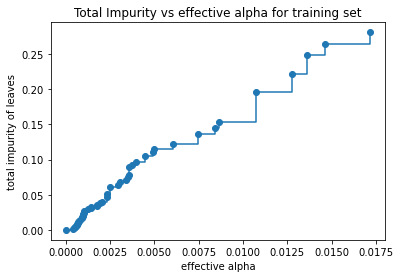

In [ ]:
# Visualitzem alphas vs impurities (excepte alpha corresponent al node root)
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Com és evident de la gràfica de adalt, el valor zero d'alpha correspon al mínim valor d'impurity (arbre no podat) i quan el valor alfa tendeix a l'infinit l'arbre tendeix a ser més impur.

A continuació, construïm un *forest of trees* amb els diferents valors de cpp_alpha que hem extret mitjançant la funció *cost_complexity_prunning_path*, en ordre.

L'últim arbre serà el node root, és a dir, l'últim valor de ccp_alphas és el valor alfa que poda tot l'arbre, deixant l'arbre, clfs[-1], amb un node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_one_hot, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {} and depth of: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1], clfs[-1].tree_.max_depth
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08551445106665204 and depth of: 0


L'últim arbre de la llista *'clfs'* te'l valor de cpp_alpha més gran, i és un arbre d'un sol node (perquè te depth 0). Podem eliminar aquest arbre trivial i continuar.

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

Plotejem com els diferents valors de cpp_aplha influencien al nombre de nodes i profunditat dels arbres podats corresponents.

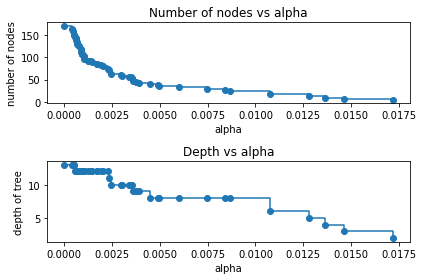

In [ ]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

La gràfica mostra que amb el valor zero de l'alfa efectiu l'arbre generat té el nombre més gran de nodes, és el més profund (creix al màxim) i s'ajusta en excés (overfitting).

A mesura que augmenta l'alfa efectiva els arbres són més podats i tenen relativament menys nodes i menys profunds. Essent així, aquest arbre generalitzen molt millor.

Obtenim la llista de puntuacions de precisió mitjanes del train i del test per a cadascun dels arbres restants i comprovem com canvien les puntuacions de precisió del train/test amb el canvi de ccp_alpha.

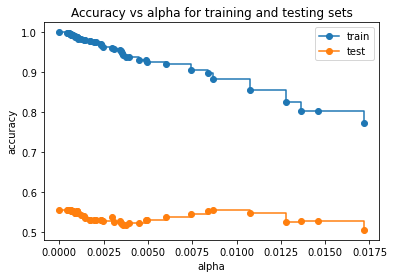

In [ ]:
train_scores = [clf.score(X_train_one_hot, y_train) for clf in clfs]
test_scores = [clf.score(X_test_one_hot, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Amb els valors inicials més petits d'alfa, hi ha una gran disparitat entre les puntuacions de precisió de l'entrenament i de la prova (overfitting, s'ajusta massa a l'entrenament i petites fluctuacions en aquest creen resultats inestables, no generalitza bé).

Quan el valor alfa augmenta, la precisió de l'entrenament disminueix i la precisió de la prova augmenta fins que arribem al punt òptim (puntuació més alta de precisió de la prova). En aquest exemple, el punt òptim es troba aproximadament en 0.010 d'alfa, on obtenim l'arbre podat òptim.

Més enllà d'aquest punt amb un augment de l'alfa, l'arbre està massa podat. Això finalment condueix a un ajust insuficient (uniderfitting), tant les puntuacions d'entrenament com de precisió de la prova disminueixen.

In [ ]:
# Model
clf_postpruning = DecisionTreeClassifier(ccp_alpha = 0.010, random_state = 0)
clf_postpruning.fit(X_train_label_encoder, y_train)

# Resultat
y_pred_post_pruning = clf_postpruning.predict(X_test_label_encoder)
print("Accuracy:",accuracy_score(y_test, y_pred_post_pruning))

Accuracy: 0.884393063583815


3. Compara els arbres resultants i els resultats que se'n obtenen. S'assemblen? Quina de les dues tècniques creus que s'adecua millor a la vostra base de dades? A part de visualment, compara'ls també quantificablement.

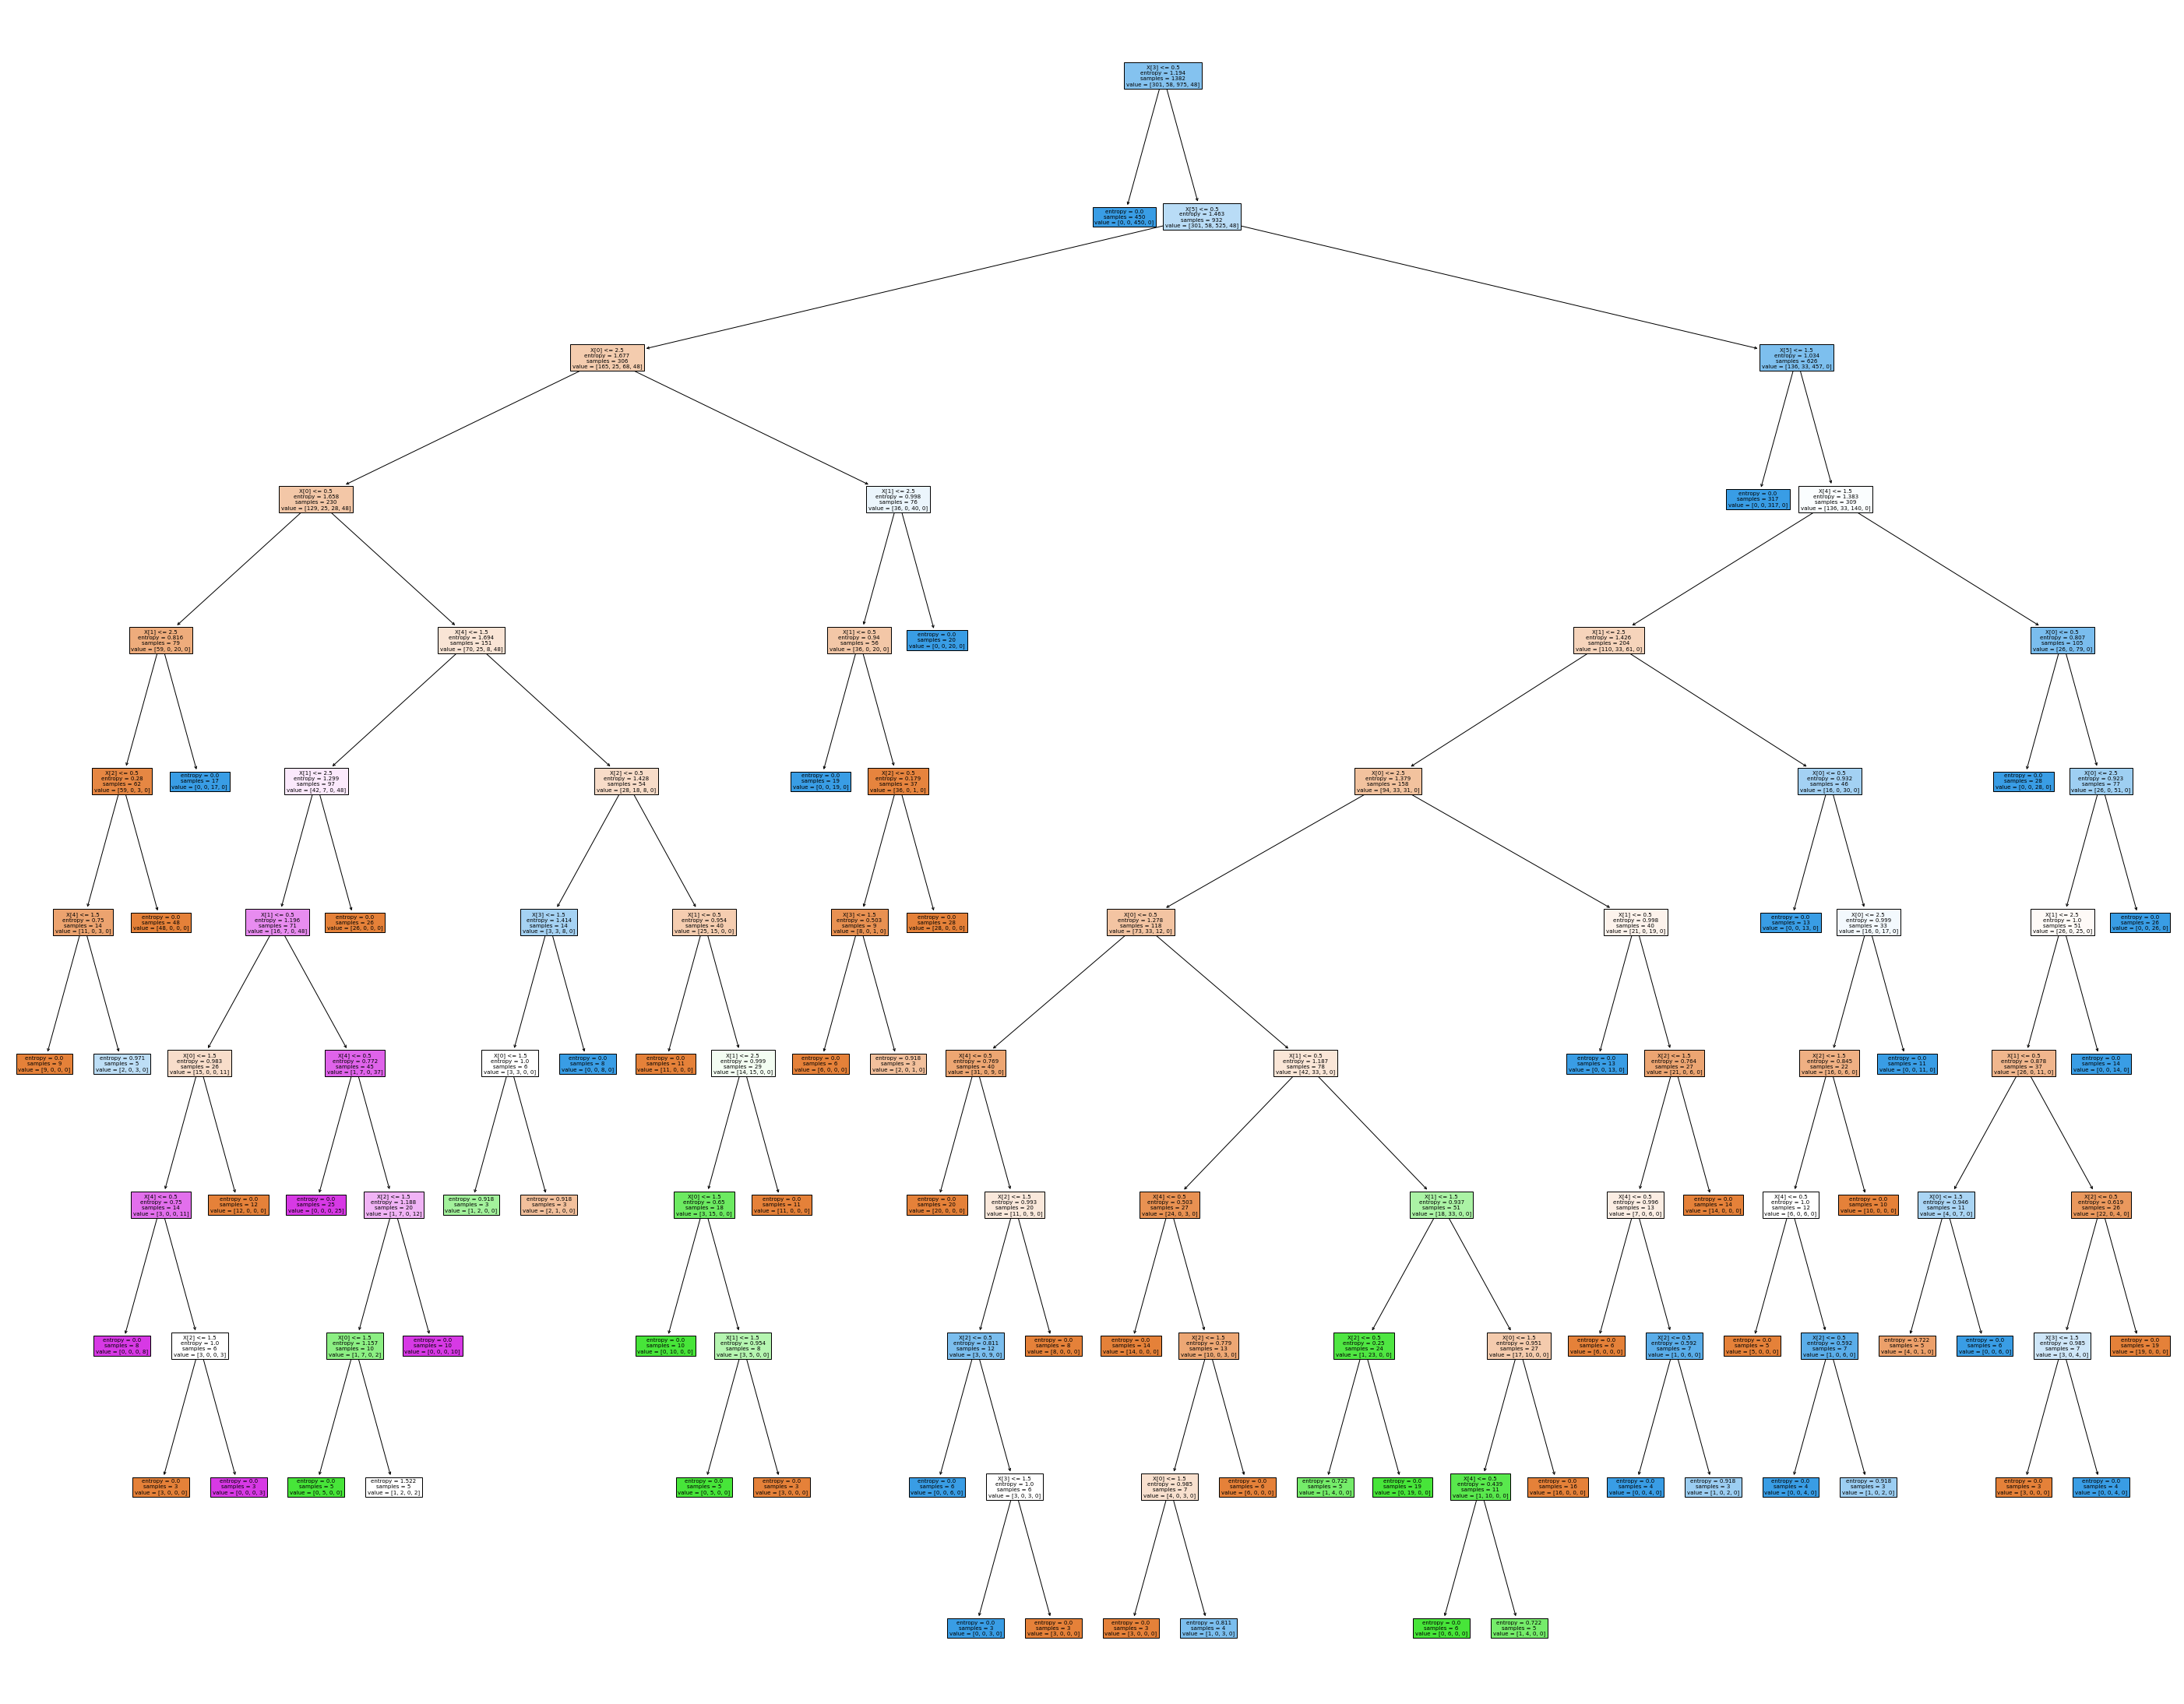

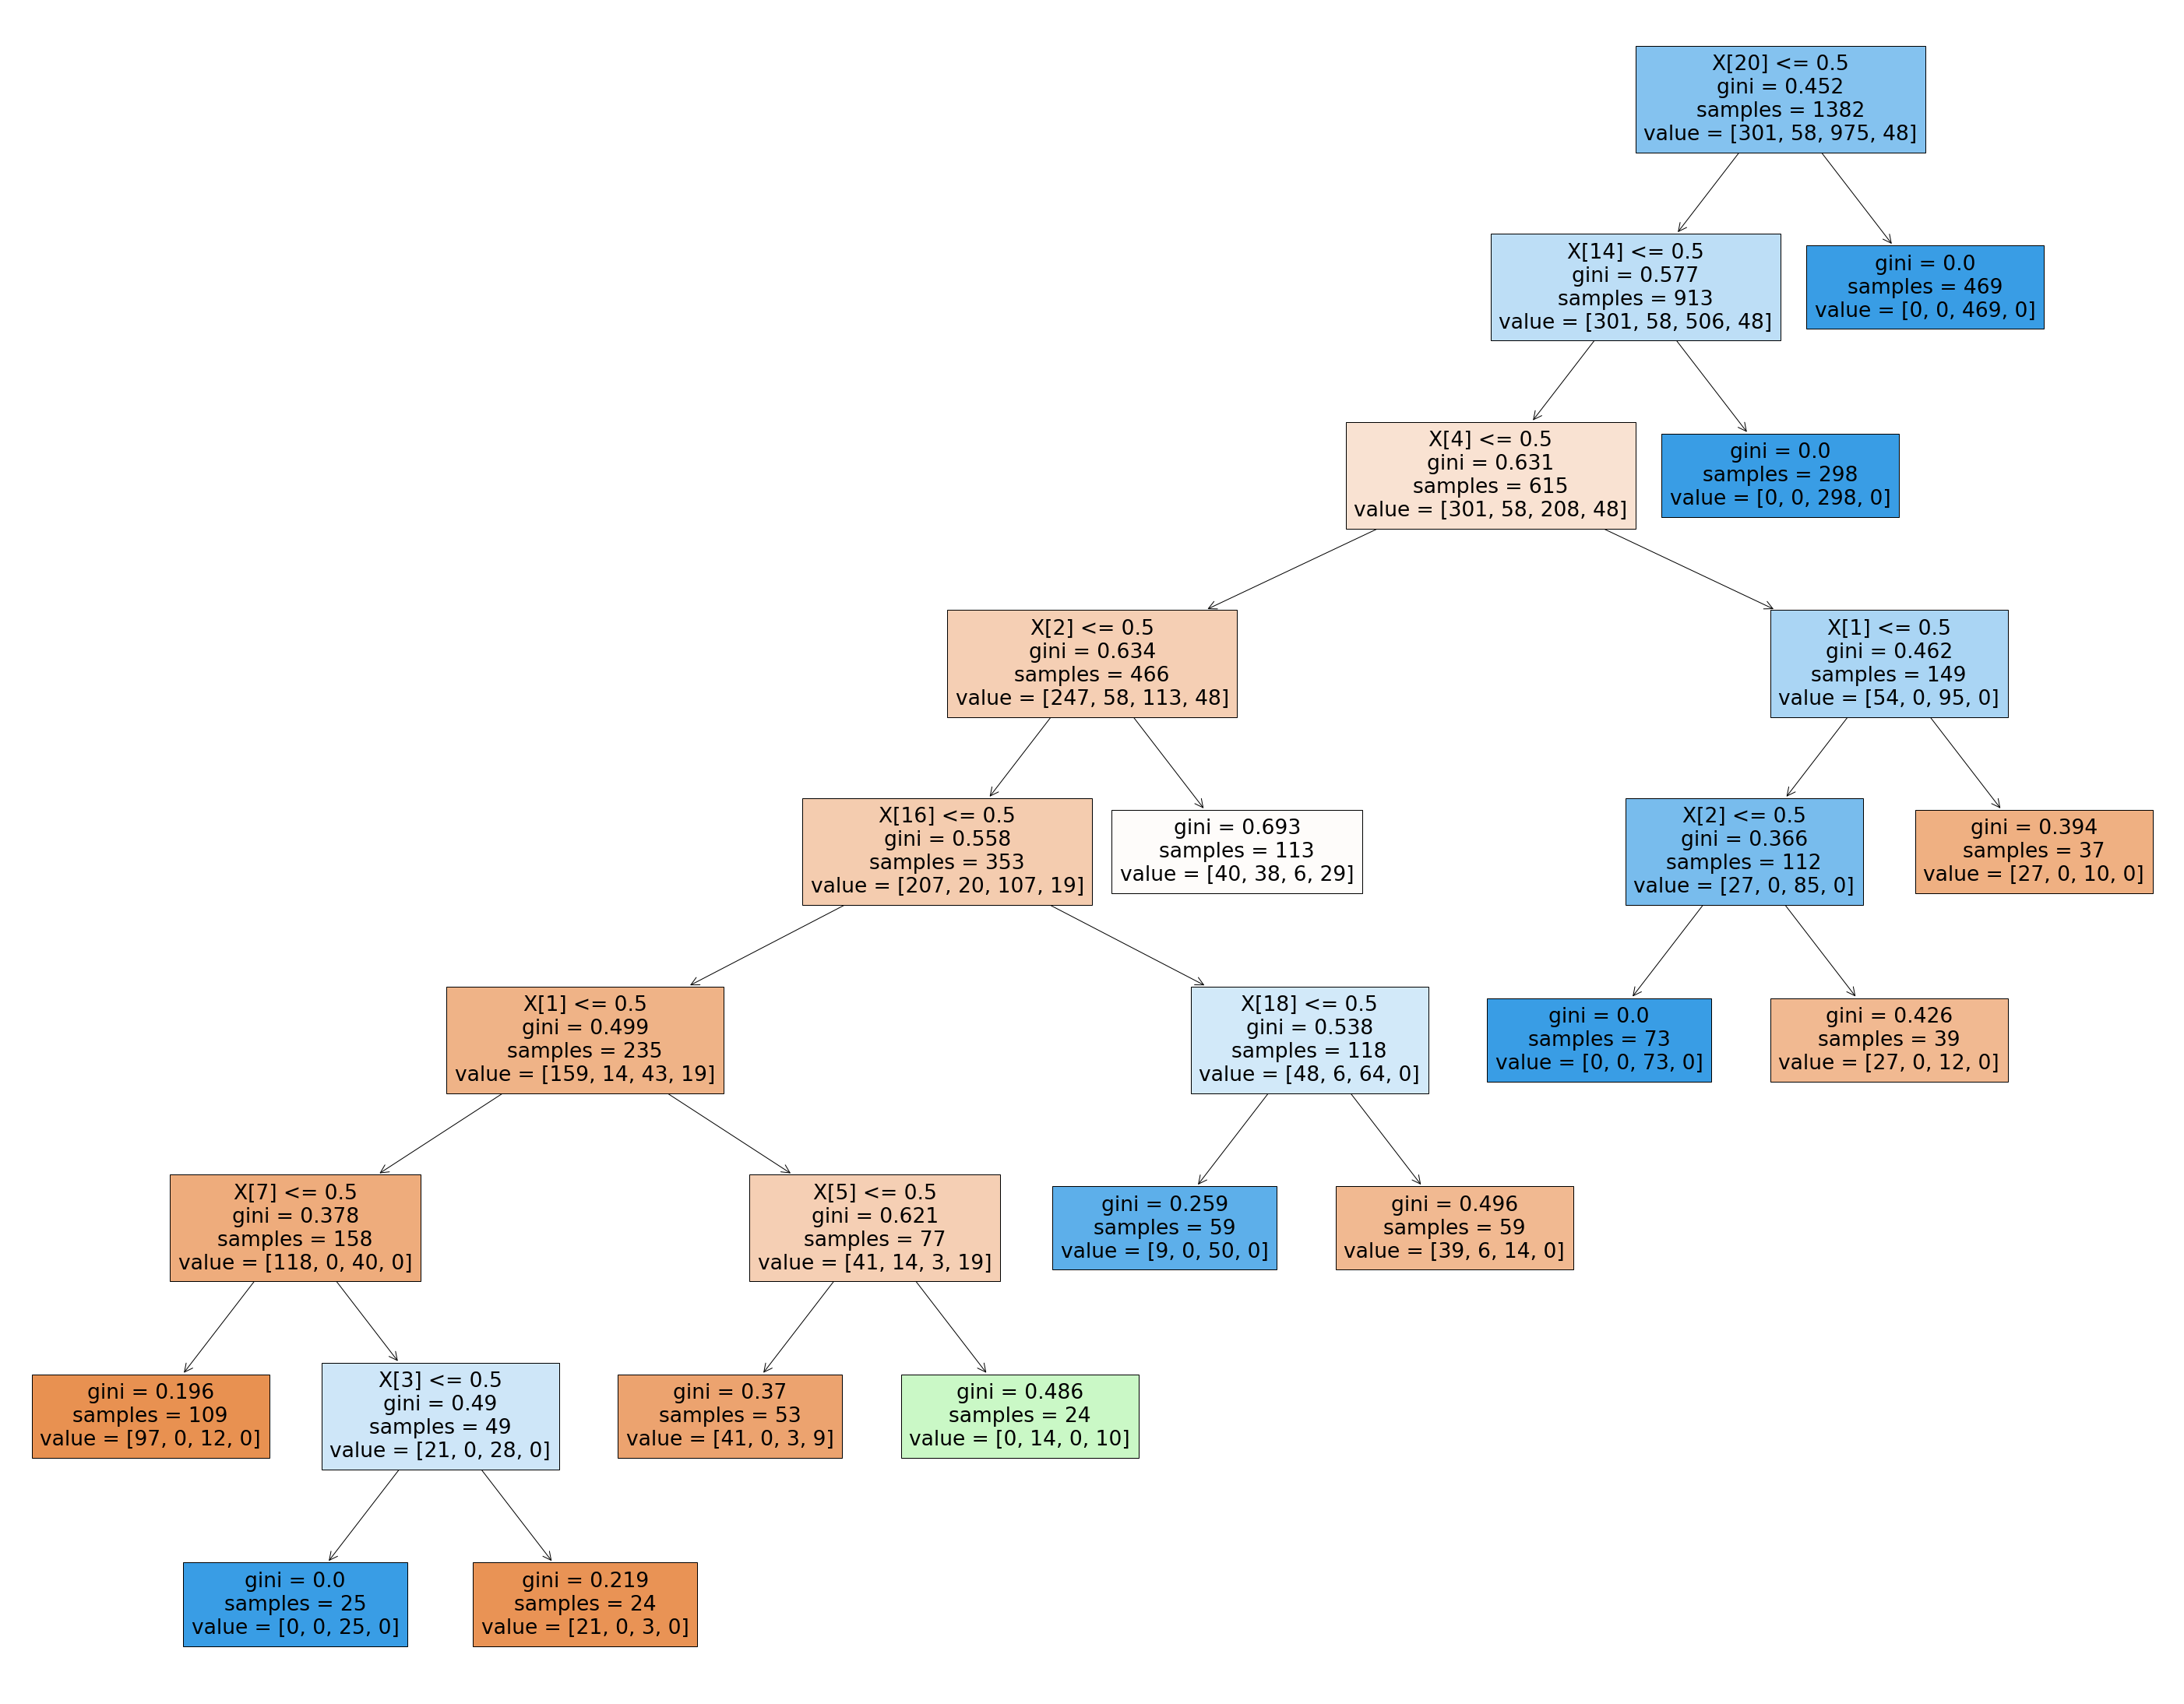

In [ ]:
# Prepruned
fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(clf_prepruned, filled=True)

# Postpruning
fig = plt.figure(figsize=(50,40))
clf_postpruning = DecisionTreeClassifier(ccp_alpha=0.010, random_state=0).fit(X_train_one_hot, y_train)
_ = tree.plot_tree(clf_postpruning, filled=True)

In [ ]:
# Info quantificable
print_tree_info(clf_prepruned)

Nodes = 121
Fulles = 61
Ratio de nodes fulla respecte el total = 0.5041322314049587
Profunditat mitjana de les fulles = 11
Característiques més importants = [0.17673263 0.20961996 0.0571409  0.19610336 0.09793093 0.26247221]
Total de classes = 4
Classes = ['acc' 'good' 'unacc' 'vgood']
El valor inferit de max_features:  6
Nombre de característiques vistes durant l'ajust (fit):  6
Nombre de sortides quan després de l'ajust (fit):  1


In [ ]:
print_tree_info(clf_postpruning)

Nodes = 25
Fulles = 13
Ratio de nodes fulla respecte el total = 0.52
Profunditat mitjana de les fulles = 8
Característiques més importants = [0.         0.0555069  0.1079957  0.04544723 0.0575495  0.04015501
 0.         0.0348769  0.         0.         0.         0.
 0.         0.         0.33693168 0.         0.03971455 0.
 0.04584778 0.         0.23597473]
Total de classes = 4
Classes = ['acc' 'good' 'unacc' 'vgood']
El valor inferit de max_features:  21
Nombre de característiques vistes durant l'ajust (fit):  21
Nombre de sortides quan després de l'ajust (fit):  1


Quant a dades, els resultats afavoreixen a la pre-poda, així i tot, la post-poda aconsegueix crear un arbre amb menys overfitting i amb una profunditat molt correcta per al problema que tenim.

Per tant, considero que la post-poda és millor en aquest cas.

## D. Ensembles / Ransom Forests(30%)

Finalment, una altra forma de reduir el overfitting és mitjançant l'ús d'ensembles. Els ensembles son agrupacions d' arbres de decisió, dels quals la sortida final és generada a través del promig de les classificacions individuals de cada arbre. 

Si tots els arbres es construïssin igual, la seva unió seria molt similar, i per tant no milloraria gaire. Per tal d'afavorir la variabilitat dels models, i aixi tenir un promig més ric, existeixen varies tècniques [documentació](https://scikit-learn.org/stable/modules/ensemble.html)

Per exemple, un dels més utilitzats són els `RandomForest`, que són una implementació especifica per ajuntar multiples arbres que retorna una mitja de la sortida de cada arbre, que ha sigut entrenat en un subconjunt aleatori de les dades. Ara bé, no són la única forma de fer ensembles. També existeixen els `ExtraTreesClassifier`, que encara afegeixen més variabilitat als arbres, restrigint la búsqueda de possibles nodes de decisió. D'altres formes d'ensembles podrien ser els `AdaBoost`, que en poques paraules, pesen els errors comesos pels arbres anteriors quan creen els següents arbres.

### Preguntes

1. Aplica models d'ensembles a les **dues** bases de dades. 

In [38]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier

# Càrreguem BBDD - car
dataset_path_car = 'car_evaluation.csv'
dataset_car = load_dataset(dataset_path)

# Separem conjunts
y = dataset_car['class']
X = dataset_car.drop('class', axis="columns")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Codififquem
cols_to_encode = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

ce_label_encoders = defaultdict(LabelEncoder)
X_train_label_encoder = X_train.apply(lambda x: ce_label_encoders[x.name].fit_transform(x))
X_test_label_encoder = X_test.apply(lambda x: ce_label_encoders[x.name].transform(x))

# Apliquem ensembles

# Random Forest
clf_random_forest = RandomForestClassifier(random_state = 0, n_estimators=100)
clf_random_forest.fit(X_train_label_encoder, y_train)
y_pred_random_forest = clf_random_forest.predict(X_test_label_encoder)

accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

# AdaBoost
clf_aboost = AdaBoostClassifier(n_estimators=100)
clf_aboost.fit(X_train_label_encoder, y_train)
y_pred_aboost = clf_aboost.predict(X_test_label_encoder)

accuracy_aboost = accuracy_score(y_test, y_pred_aboost)

#ExtraTreesClassifier
clf_et = ExtraTreesClassifier(n_estimators=100)
clf_et.fit(X_train_label_encoder, y_train)
y_pred_et = clf_et.predict(X_test_label_encoder)

accuracy_et = accuracy_score(y_test, y_pred_et)

NameError: name 'accuracy_score' is not defined

In [ ]:
# Càrreguem BBDD - income
dataset_path = 'income_evaluation.csv'
cols_to_encode = [
        'age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country'
    ]

dataset_income = load_dataset(dataset_path)

# Separem conjunts
y = dataset_income['income']
X = dataset_income.drop('income', axis="columns")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Codifiquem
cols_to_encode = [" workclass"," fnlwgt"," education"," marital-status"," occupation"," relationship"," race"," sex"," native-country"]
db_binary = ce.binary.BinaryEncoder(cols = cols_to_encode)
X_train_binary = db_binary.fit_transform(X_train)
X_test_binary = db_binary.transform(X_test)


# Random Forest
clf_random_forest_income = RandomForestClassifier(random_state = 0, n_estimators = 100)
clf_random_forest_income.fit(X_train_binary, y_train)
y_pred_random_forest = clf_random_forest_income.predict(X_test_binary)

accuracy_random_forest_income = accuracy_score(y_test, y_pred_random_forest)

# AdaBoost
clf_aboost_income = AdaBoostClassifier(n_estimators=100)
clf_aboost_income.fit(X_train_binary, y_train)
y_pred_aboost = clf_aboost_income.predict(X_test_binary)

accuracy_aboost_income = accuracy_score(y_test, y_pred_aboost)

#ExtraTreesClassifier
clf_et_income = ExtraTreesClassifier(n_estimators=100)
clf_et_income.fit(X_train_binary, y_train)
y_pred_et = clf_et_income.predict(X_test_binary)

accuracy_et_income = accuracy_score(y_test, y_pred_et)


/home/mdalm/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


2. Compara els resultats obtinguts amb els diferents models. 

In [ ]:
print("DATASET 1 (car)")
print("RandomForest: ", accuracy_random_forest)
print("AdaBoost: ", accuracy_aboost)
print("ExtraTreesClassifier: ", accuracy_et)

print("\n---------\n")

print("DATASET 2 (income)")
print("RandomForest: ", accuracy_random_forest_income)
print("AdaBoost: ", accuracy_aboost_income)
print("ExtraTreesClassifier: ", accuracy_et_income)

DATASET 1 (car)
RandomForest:  0.9710982658959537
AdaBoost:  0.7861271676300579
ExtraTreesClassifier:  0.976878612716763

---------

DATASET 2 (income)
RandomForest:  0.8624289881774911
AdaBoost:  0.8661139259941655
ExtraTreesClassifier:  0.8452326116996776


3. Quin dona millors resultats?

Veiem que aparentemt la primera BBDD (car) tenim millors prediccions (més accuracy). Quant a ensembles, sembla que el que millor funciona en aquests casos es *RandomForest*.

Tot i això, hem de tenir en compte que les BBDD s'han codificat amb diferents mètodes (LabelEncoder i BinaryEncoder, respectivament), cosa que influeix en els resultats. 

5. Pots combinar models que s'han après amb caracteristiques codificades de forma diferent? Creus que aconseguiràs un resultat més bo?

In [37]:
from sklearn.ensemble import  VotingClassifier

clf_comb = VotingClassifier(estimators=[('random_forest', clf_random_forest), ('ada_boost', clf_aboost), ('extra_trees', clf_et)], voting='hard')
clf_comb.fit(X_train_label_encoder, y_train)
y_pred_clf_comb = clf_comb.predict(X_test_label_encoder)

accuracy_clf_comb = accuracy_score(y_test, y_pred_clf_comb)

NameError: name 'clf_random_forest' is not defined

In [ ]:
clf_comb = VotingClassifier(estimators=[('random_forest', clf_random_forest_income), ('ada_boost', clf_aboost_income), ('extra_trees', clf_et_income)], voting='hard')
clf_comb.fit(X_train_binary, y_train)
y_pred_clf_comb = clf_comb.predict(X_train_binary)

accuracy_clf_comb = accuracy_score(y_test, y_pred_clf_comb)